# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import datetime
from matplotlib import figure
import glob
import scipy.stats as stats
from sklearn.utils import resample
from sklearn import metrics
import seaborn as seabornInstance 
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression #importing the package
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing

# Reading the Dataset and Gathering the Insights

In [2]:
fedgovt2018_sf = pd.read_csv('./sf2018.csv')
fedgovt2018_sf.head()

,Name,Grade,Pay Plan,Salary,Bonus,Agency,Location,Occupation,FY
0,"AARON,CEDRIC K",2,WG,"$41,635.65",$0.00,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,CUSTODIAL WORKING,2018
1,"AARSTOL,MICHAEL",15,GS,"$166,500.00",$0.00,INTERNAL REVENUE SERVICE,SAN FRANCISCO,SENIOR ECONOMIST,2018
2,"AASMAA,ALLAN I",14,GS,"$161,817.00",$0.00,GENERAL SERVICES ADMINISTRATION,SAN FRANCISCO,GENERAL ATTORNEY,2018
3,"ABAD,RHONEIL CALUCIN",5,WG,"$51,548.90",$0.00,DEPARTMENT OF INTERIOR,SAN FRANCISCO,MAINTENANCE MECHANIC,2018
4,"ABADILLA,MARIA V",6,GS,"$52,424.00",$0.00,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,MEDICAL SUPPORT ASSISTANCE,2018


In [3]:
fedgovt2018_sf.columns

Index(['Name', 'Grade', 'Pay Plan', 'Salary', 'Bonus', 'Agency', 'Location',
       'Occupation', 'FY'],
      dtype='object')

In [4]:
fedgovt2018_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889 entries, 0 to 7888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        7889 non-null   object
 1   Grade       7889 non-null   object
 2   Pay Plan    7871 non-null   object
 3   Salary      7889 non-null   object
 4   Bonus       7889 non-null   object
 5   Agency      7889 non-null   object
 6   Location    7889 non-null   object
 7   Occupation  7889 non-null   object
 8   FY          7889 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 554.8+ KB


In [5]:
list(fedgovt2018_sf.select_dtypes(include=['object']))

['Name',
 'Grade',
 'Pay Plan',
 'Salary',
 'Bonus',
 'Agency',
 'Location',
 'Occupation']

# Checking for NA Values

In [6]:
fedgovt2018_sf.isnull().values.any()

True

In this dataset, there are other ways of given NA values, so we are going to do some data cleansing on it.

# Cleaning up some of the data

In [7]:
## Salary Column
fedgovt2018_sf['Salary'] = fedgovt2018_sf['Salary'].str.replace(',', '')
fedgovt2018_sf['Salary'] = fedgovt2018_sf['Salary'].str.replace('$', '')
fedgovt2018_sf['Salary'] = fedgovt2018_sf['Salary'].astype(float)

In [8]:
## Bonus Column
fedgovt2018_sf['Bonus'] = fedgovt2018_sf['Bonus'].str.replace(',', '')
fedgovt2018_sf['Bonus'] = fedgovt2018_sf['Bonus'].str.replace('$', '')
fedgovt2018_sf['Bonus'] = fedgovt2018_sf['Bonus'].astype(float)

In [9]:
fedgovt2018_sf.head()

,Name,Grade,Pay Plan,Salary,Bonus,Agency,Location,Occupation,FY
0,"AARON,CEDRIC K",2,WG,41635.65,0.0,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,CUSTODIAL WORKING,2018
1,"AARSTOL,MICHAEL",15,GS,166500.00,0.0,INTERNAL REVENUE SERVICE,SAN FRANCISCO,SENIOR ECONOMIST,2018
2,"AASMAA,ALLAN I",14,GS,161817.00,0.0,GENERAL SERVICES ADMINISTRATION,SAN FRANCISCO,GENERAL ATTORNEY,2018
3,"ABAD,RHONEIL CALUCIN",5,WG,51548.90,0.0,DEPARTMENT OF INTERIOR,SAN FRANCISCO,MAINTENANCE MECHANIC,2018
4,"ABADILLA,MARIA V",6,GS,52424.00,0.0,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,MEDICAL SUPPORT ASSISTANCE,2018


# Dropping the unneeded values

In [10]:
fedgovt2018_sf = fedgovt2018_sf[fedgovt2018_sf.Name != "NAME WITHHELD BY AGENCY"]
fedgovt2018_sf = fedgovt2018_sf[fedgovt2018_sf.Name != "NAME WITHHELD BY OPM"]

# Looking at the Dataset Again

In [11]:
fedgovt2018_sf.head()

,Name,Grade,Pay Plan,Salary,Bonus,Agency,Location,Occupation,FY
0,"AARON,CEDRIC K",2,WG,41635.65,0.0,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,CUSTODIAL WORKING,2018
1,"AARSTOL,MICHAEL",15,GS,166500.00,0.0,INTERNAL REVENUE SERVICE,SAN FRANCISCO,SENIOR ECONOMIST,2018
2,"AASMAA,ALLAN I",14,GS,161817.00,0.0,GENERAL SERVICES ADMINISTRATION,SAN FRANCISCO,GENERAL ATTORNEY,2018
3,"ABAD,RHONEIL CALUCIN",5,WG,51548.90,0.0,DEPARTMENT OF INTERIOR,SAN FRANCISCO,MAINTENANCE MECHANIC,2018
4,"ABADILLA,MARIA V",6,GS,52424.00,0.0,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,MEDICAL SUPPORT ASSISTANCE,2018


### Splitting the Name Columns to First, Middle and Last and Dropping the Name Column

In [12]:
fedgovt2018_sf[['Last Name','First & Middle Name']] = fedgovt2018_sf['Name'].str.split(',',expand=True)
fedgovt2018_sf.drop(columns =["Name"], inplace = True)  

In [13]:
fedgovt2018_sf.head()

,Grade,Pay Plan,Salary,Bonus,Agency,Location,Occupation,FY,Last Name,First & Middle Name
0,2,WG,41635.65,0.0,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,CUSTODIAL WORKING,2018,AARON,CEDRIC K
1,15,GS,166500.00,0.0,INTERNAL REVENUE SERVICE,SAN FRANCISCO,SENIOR ECONOMIST,2018,AARSTOL,MICHAEL
2,14,GS,161817.00,0.0,GENERAL SERVICES ADMINISTRATION,SAN FRANCISCO,GENERAL ATTORNEY,2018,AASMAA,ALLAN I
3,5,WG,51548.90,0.0,DEPARTMENT OF INTERIOR,SAN FRANCISCO,MAINTENANCE MECHANIC,2018,ABAD,RHONEIL CALUCIN
4,6,GS,52424.00,0.0,DEPARTMENT OF VETERANS AFFAIRS,SAN FRANCISCO,MEDICAL SUPPORT ASSISTANCE,2018,ABADILLA,MARIA V


# Combining the Columns Into One 

In [14]:
fedgovt2018_sf['Pay_Grade']=fedgovt2018_sf['Pay Plan']+fedgovt2018_sf['Grade']

# Dropping the Other Columns

In [15]:
fedgovt2018_sf.drop(columns =["Pay Plan", "Bonus", "Location", "FY", "Last Name"], inplace = True) 

In [16]:
fedgovt2018_sf.head(20)

,Grade,Salary,Agency,Occupation,First & Middle Name,Pay_Grade
0,2,41635.65,DEPARTMENT OF VETERANS AFFAIRS,CUSTODIAL WORKING,CEDRIC K,WG2
1,15,166500.00,INTERNAL REVENUE SERVICE,SENIOR ECONOMIST,MICHAEL,GS15
2,14,161817.00,GENERAL SERVICES ADMINISTRATION,GENERAL ATTORNEY,ALLAN I,GS14
3,5,51548.90,DEPARTMENT OF INTERIOR,MAINTENANCE MECHANIC,RHONEIL CALUCIN,WG5
4,6,52424.00,DEPARTMENT OF VETERANS AFFAIRS,MEDICAL SUPPORT ASSISTANCE,MARIA V,GS6
5,12,91535.00,DEPARTMENT OF VETERANS AFFAIRS,GENERAL HEALTH SCIENCE,LINDA R,GS12
6,1,109395.00,DEPARTMENT OF VETERANS AFFAIRS,NURSE,MELANIA GRAMA,VN1
7,5,40315.00,DEPARTMENT OF VETERANS AFFAIRS,NURSING ASSISTANT,JENNIFER GUINTO,GS5
8,13,122891.00,DEPARTMENT OF TRANSPORTATION,GENERAL ENGINEERING,JANICE E,GS13
9,7,64917.00,GENERAL SERVICES ADMINISTRATION,MISCELLANEOUS CLERK AND ASSISTANT,MARIBEL,GS7


# Looking at Salaries Over $200k

In [17]:
over_200k = fedgovt2018_sf[fedgovt2018_sf.Salary > 200000.00]
over_200k.head(20)

,Grade,Salary,Agency,Occupation,First & Middle Name,Pay_Grade
58,14,238436.0,FEDERAL DEPOSIT INSURANCE CORPORATION,FINANCIAL INSTITUTION EXAMINING,PAUL RAYMOND,CG14
126,3,210700.0,DEPARTMENT OF VETERANS AFFAIRS,alid,NANCY S,VN3
168,17,243500.0,SECURITIES AND EXCHANGE COMMISSION,GENERAL ATTORNEY,JUDITH L,SK17
186,1,243500.0,FEDERAL DEPOSIT INSURANCE CORPORATION,FINANCIAL ANALYSIS,KEVIN T,CM1
264,3,210700.0,DEPARTMENT OF VETERANS AFFAIRS,alid,NANCY G,AD3
279,16,243500.0,SECURITIES AND EXCHANGE COMMISSION,GENERAL ATTORNEY,EDWARD BARRETT,SK16
352,14,225756.0,FEDERAL DEPOSIT INSURANCE CORPORATION,FINANCIAL INSTITUTION EXAMINING,MICHAEL LOUIS,CG14
395,15,243500.0,FEDERAL DEPOSIT INSURANCE CORPORATION,FINANCIAL INSTITUTION EXAMINING,DOMENIC A,CG15
482,7,268400.0,DEPARTMENT OF TREASURY,FINANCIAL INSTITUTION EXAMINING,RACHEL Y,NB7
489,1,243500.0,FEDERAL DEPOSIT INSURANCE CORPORATION,INFORMATION TECHNOLOGY MANAGEMENT,EARL WHITMAN,CM1


In [18]:
over_200k.count()

Grade                  247
Salary                 247
Agency                 247
Occupation             247
First & Middle Name    247
Pay_Grade              247
dtype: int64

# Looking at the Value Counts

In [19]:
fedgovt2018_sf['Occupation'].value_counts()

NURSE                                       683
GENERAL ATTORNEY                            570
MISCELLANEOUS ADMINISTRATION AND PROGRAM    449
MEDICAL OFFICER                             344
FINANCIAL INSTITUTION EXAMINING             238
                                           ... 
SECRETARY (OFFICE AUTOMATION)                 1
SUPV INDIVID TAX ADVIS SPEC                   1
FISH BIOLOGY                                  1
GENERAL MATHEMATICS AND STATISTICS            1
MANAGEMENT AND PROG ASST OA                   1
Name: Occupation, Length: 318, dtype: int64

In [20]:
fedgovt2018_sf.describe()

,Salary
count,7737.000000
mean,109465.776382
std,44091.299823
min,0.000000
25%,73905.000000
50%,109251.000000
75%,136936.000000
max,331175.000000


# Bootstrap Confidence Interval

In [21]:
federal_salary18 = np.array(fedgovt2018_sf['Salary'])

In [22]:
# Standard Deviation
sd = np.sqrt(np.sum(np.power(federal_salary18 - federal_salary18.mean(),2)) / (federal_salary18.size-1))
sd

44091.29982313082

# Confidence Interval Calculations at Alpha=5%

In [23]:
alpha = 0.05
interval = stats.t.ppf(1.0 - (alpha / 2.0),federal_salary18.size-1) * (sd / np.sqrt(federal_salary18.size))
ci = (federal_salary18.mean() - interval, federal_salary18.mean() + interval)
ci

(108483.16305775037, 110448.38970688709)

# Second Method

In [24]:
fed18_bootstrap = []
for i in range(10000):
    np.random.seed(i)
    fed18_bootstrap.append((resample(federal_salary18)))
print(len(fed18_bootstrap))

10000


In [25]:
bootstrap_means = np.mean(fed18_bootstrap, axis=1)
bootstrap_means

array([109163.3026677 , 109185.02838697, 109652.41301926, ...,
       109608.01385679, 109523.26439576, 108991.39700271])

# Creating the Histogram of Bootstrap Means

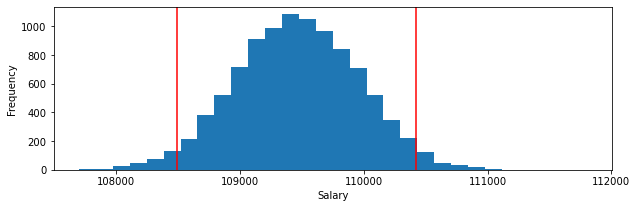

Lower bound: 108488.2473577291
Upper bound: 110422.45661270518


In [26]:
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

fig = plt.figure(figsize=(10,3))
ax = plt.hist(bootstrap_means, bins=30)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.axvline(lower_bound, color='r')
plt.axvline(upper_bound, color='r')
plt.show()

print('Lower bound: {}'.format(lower_bound))
print('Upper bound: {}'.format(upper_bound))

# Calculating the Z-Score

In [27]:
def zs(column):    
    z_score = (column - column.mean()) / column.std()
    return z_score

In [28]:
zs(federal_salary18)

array([-1.53850103,  1.29363185,  1.18741356, ...,  2.65627897,
        0.62307075, -0.00487149])

# Calculating Chi-Square Test

In [29]:
contingency_table = pd.crosstab(
    fedgovt2018_sf['Salary'],
    fedgovt2018_sf['Grade'],
    margins = True
)
contingency_table

Grade,##,0,1,10,11,12,13,14,15,16,...,J,JH,JI,JJ,JK,JL,K,L,PH,All
Salary,,,,,,,,,,,,,,,,,,,,,
0.0,2,0,0,0,0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,10
21588.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29249.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29343.22,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
30118.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
272100.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
273400.0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [30]:
stats.chi2_contingency(contingency_table)

(272287.65684320306,
 0.0,
 62909,
 array([[2.58498126e-03, 6.94067468e-01, 2.09383482e-01, ...,
         2.58498126e-03, 4.12304511e-01, 1.00000000e+01],
        [2.58498126e-04, 6.94067468e-02, 2.09383482e-02, ...,
         2.58498126e-04, 4.12304511e-02, 1.00000000e+00],
        [2.58498126e-04, 6.94067468e-02, 2.09383482e-02, ...,
         2.58498126e-04, 4.12304511e-02, 1.00000000e+00],
        ...,
        [7.75494378e-04, 2.08220240e-01, 6.28150446e-02, ...,
         7.75494378e-04, 1.23691353e-01, 3.00000000e+00],
        [2.58498126e-04, 6.94067468e-02, 2.09383482e-02, ...,
         2.58498126e-04, 4.12304511e-02, 1.00000000e+00],
        [2.00000000e+00, 5.37000000e+02, 1.62000000e+02, ...,
         2.00000000e+00, 3.19000000e+02, 7.73700000e+03]]))

From the contingency table that is created for all the different salaries, the salary for chi-square test determined to be 272287.66, p-value at 0.0, and degrees of freedom at 62909. This statistic isn't exactly realistic, which we can reject the null hypothesis.

# Implementing CUSUM

Cusum or (Cumulative Sum) is a function that is being used to detect changes overtime that is usually used in the time-series analysis. 

In [31]:
# Calculating the Mean
def calc_mean(L):
    return calc_mean__1(L)

def calc_mean__1(L):
    if len(L) > 0:
        import numpy as np
        return float(np.mean(L))
    return 0.0

# Calculating the Cumulative Sum
def cusum(x, mu):
    out = [0]
    for i, elem in enumerate(x):
        out.append(max(0, out[i] + (elem - mu)))
    return out

# Index of the Cusum
def get_index(CS, alpha):
    for i, elem in enumerate(CS):
        if elem > alpha: return i
    return -1

# Identifying the Changes
def raise_alarm(x, alpha):
    mu = calc_mean(x)
    CS = cusum(x, mu)
    print(CS)
    out_index = get_index(CS, alpha)
    print(out_index)
    if out_index == -1: return (-1, None)
    else: return (out_index, x[out_index])
    
# Calculating the Mean Dynamic
def calc_mean_dynamic(L):
    ### BEGIN SOLUTION
    fill = [0, 0, 0, 0]
    L_padded = fill + L
    mu = []
    for i in range(len(L)):
        mu.append(calc_mean(L_padded[i:i+4]))
    return mu

In [32]:
# Implementing the CUSUM Algorithm
mu = 109465.78
x = fedgovt2018_sf['Salary']
cusum(x, mu)

[0,
 0,
 57034.22,
 109385.44,
 51468.560000000005,
 0,
 0,
 0,
 0,
 13425.220000000001,
 0,
 0,
 0,
 54734.22,
 71670.44,
 44259.66,
 0,
 24703.22,
 45150.44,
 62086.66,
 8276.880000000005,
 0,
 29942.619999999995,
 28204.64,
 10273.86,
 0,
 6402.220000000001,
 0,
 9914.220000000001,
 0,
 0,
 0,
 23959.22,
 0,
 54734.22,
 0,
 54734.22,
 109468.44,
 158620.66,
 156380.88,
 138067.1,
 100299.32,
 120746.54000000001,
 66936.76000000001,
 66721.98000000001,
 87925.20000000001,
 115395.42000000001,
 120332.64000000001,
 159035.86000000002,
 164727.08000000002,
 167437.30000000002,
 139267.52000000002,
 159714.74000000002,
 129080.96000000002,
 128378.18000000002,
 141379.40000000002,
 161612.62000000002,
 201515.84000000003,
 178274.06000000003,
 307244.28,
 271683.5,
 248441.72,
 191399.94,
 147091.16,
 132113.38,
 72584.6,
 18049.820000000007,
 9459.040000000008,
 0,
 0,
 54734.22,
 77492.44,
 90346.46,
 100015.08,
 82084.3,
 121987.52,
 161890.74,
 133871.96,
 136233.18,
 168172.4,
 173

In [34]:
# Implementing the Raise Alarm Algorithm
alpha = 0.05
x = fedgovt2018_sf['Salary']
raise_alarm(x, alpha)

[0, 0, 57034.22361768123, 109385.44723536246, 51468.57085304369, 0, 0, 0, 0, 13425.22361768123, 0, 0, 0, 54734.22361768123, 71670.44723536246, 44259.67085304369, 0, 24703.22361768123, 45150.44723536246, 62086.67085304369, 8276.894470724917, 0, 29942.623617681224, 28204.647235362456, 10273.870853043685, 0, 6402.223617681229, 0, 9914.22361768123, 0, 0, 0, 23959.22361768123, 0, 54734.22361768123, 0, 54734.22361768123, 109468.44723536246, 158620.67085304367, 156380.89447072492, 138067.11808840616, 100299.34170608739, 120746.56532376862, 66936.78894144985, 66722.01255913108, 87925.23617681231, 115395.45979449354, 120332.68341217477, 159035.907029856, 164727.13064753724, 167437.35426521848, 139267.57788289973, 159714.80150058097, 129081.0251182622, 128378.24873594343, 141379.47235362465, 161612.6959713059, 201515.91958898713, 178274.14320666838, 307244.3668243496, 271683.59044203087, 248441.8140597121, 191400.03767739335, 147091.2612950746, 132113.48491275584, 72584.70853043707, 18049.932148

(2, 161817.0)

In [36]:
# Creating the If-Else Column on binary values for Logistic Regression

fedgovt2018_sf['is_govt_binary'] = np.where(fedgovt2018_sf.Salary>=200000.00, 1,0)

In [37]:
fedgovt2018_sf.tail() #testing to see if the column is working

,Grade,Salary,Agency,Occupation,First & Middle Name,Pay_Grade,is_govt_binary
7884,14,141071.0,DEPARTMENT OF COMMERCE,PATENT EXAMINING,BRANDY A,GS14,0
7885,11,73905.0,DEPARTMENT OF VETERANS AFFAIRS,MISCELLANEOUS ADMINISTRATION AND PROGRAM,ROGELIO C,GS11,0
7886,14,226577.0,SECURITIES AND EXCHANGE COMMISSION,ACCOUNTING,JENNET LEONG,SK14,1
7887,13,136936.0,DEPARTMENT OF VETERANS AFFAIRS,PSYCHOLOGY,JOAN E,GS13,0
7888,12,109251.0,DEPARTMENT OF VETERANS AFFAIRS,SOCIAL WORK,LEILA M,GS12,0


In [38]:
# Selecting the Variables for the Logistic Regression with Salary and Binary

X = pd.DataFrame(fedgovt2018_sf['Salary'])
y = pd.DataFrame(fedgovt2018_sf['is_govt_binary'])

In [39]:
# Creating the Train-Test Split for Logistic Regression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=349)

In [40]:
# Implementing the Logistic Regression Model

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\atse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [41]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9741602067183462


# Filtering to a Specific Agency to Use

In [42]:
irs_2018sf = fedgovt2018_sf[fedgovt2018_sf.Agency == "INTERNAL REVENUE SERVICE"] #example
irs_2018sf.head(10)

,Grade,Salary,Agency,Occupation,First & Middle Name,Pay_Grade,is_govt_binary
1,15,166500.0,INTERNAL REVENUE SERVICE,SENIOR ECONOMIST,MICHAEL,GS15,0
192,7,59531.0,INTERNAL REVENUE SERVICE,LEG ASST OA,AGNIESZKA K,GS7,0
382,14,144146.0,INTERNAL REVENUE SERVICE,INTERNATIONAL TRANFER PRICING SPECIALI,KEVIN J,GS14,0
520,1,166500.0,INTERNAL REVENUE SERVICE,TER MGR,NORA T,IR1,0
542,6,59698.0,INTERNAL REVENUE SERVICE,EXAM TECH,THEODORE R,GS6,0
600,13,118392.0,INTERNAL REVENUE SERVICE,ECONOMIST,RICHARD C,GS13,0
606,14,148386.0,INTERNAL REVENUE SERVICE,ATTY,KERRIE M,GS14,0
664,15,166500.0,INTERNAL REVENUE SERVICE,DEPUTY AREA CNSL (SL)(LMSB),HENRY C,GS15,0
668,14,161106.0,INTERNAL REVENUE SERVICE,APPEALS COORDINATOR (ECONOMICS),RANDI M,GS14,0
697,11,83069.0,INTERNAL REVENUE SERVICE,TAX SPECIALIST,EVELINA P,GS11,0


# Value Counts of the Roles in the IRS

In [43]:
irs_2018sf['Occupation'].value_counts()

SR ATTY                                   22
PARALEGAL SPECLST                          8
LEG ASST OA                                7
ECONOMIST                                  6
SHARED ADMINISTRATIVE ASSISTANT (OA)       5
AAC                                        5
SENIOR ECONOMIST                           4
SR CNSL                                    4
LEGAL ASSISTANT (OA)                       4
INDIV TAXPYR ADVISORY SPECIALIST           4
GENERAL ENGINEER                           3
TAX COMP OFC                               3
TAX SPECIALIST                             3
APPEALS COORDINATOR (ECONOMICS)            2
SPECIAL TRIAL ATTORNEY                     2
CASE PROCESSOR (OFFICE AUTOMATION)         2
BUD ANAL                                   2
MGT PGM ANLS                               2
ASC ATTY                                   2
INTERNATIONAL TRANFER PRICING SPECIALI     2
EXAM TECH                                  2
INF TEC SPEC                               2
SECY OA   

# Looking at the Economist and Senior Economist Salaries

In [44]:
# Economist
econo = irs_2018sf[irs_2018sf.Occupation == "ECONOMIST"]
econo

,Grade,Salary,Agency,Occupation,First & Middle Name,Pay_Grade,is_govt_binary
600,13,118392.0,INTERNAL REVENUE SERVICE,ECONOMIST,RICHARD C,GS13,0
760,13,121980.0,INTERNAL REVENUE SERVICE,ECONOMIST,THEODORE S,GS13,0
947,13,139916.0,INTERNAL REVENUE SERVICE,ECONOMIST,RICHARD A,GS13,0
5258,13,125567.0,INTERNAL REVENUE SERVICE,ECONOMIST,AUBREY L,GS13,0
5621,13,111218.0,INTERNAL REVENUE SERVICE,ECONOMIST,BRYAN A,GS13,0
7632,13,121980.0,INTERNAL REVENUE SERVICE,ECONOMIST,SERENA S,GS13,0


In [45]:
# Senior Economist
sen_econo = irs_2018sf[irs_2018sf.Occupation == "SENIOR ECONOMIST"]
sen_econo

,Grade,Salary,Agency,Occupation,First & Middle Name,Pay_Grade,is_govt_binary
1,15,166500.0,INTERNAL REVENUE SERVICE,SENIOR ECONOMIST,MICHAEL,GS15,0
1173,14,156866.0,INTERNAL REVENUE SERVICE,SENIOR ECONOMIST,CHUN-HUNG,GS14,0
2326,14,148386.0,INTERNAL REVENUE SERVICE,SENIOR ECONOMIST,EVAN W,GS14,0
6871,14,165346.0,INTERNAL REVENUE SERVICE,SENIOR ECONOMIST,ELOISA D,GS14,0


# Creating a Histogram for IRS Distributions in Salaries

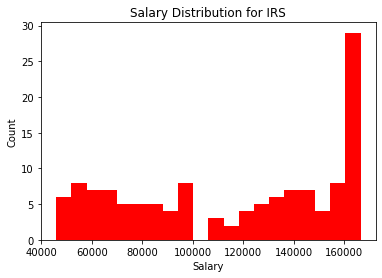

<Figure size 1440x1440 with 0 Axes>

In [46]:
plt.hist(irs_2018sf['Salary'], bins = 20, color = 'red')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution for IRS')
fig= plt.figure(figsize=(20,20))

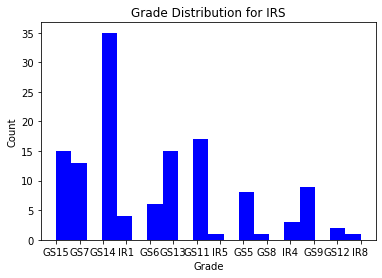

<Figure size 1440x1440 with 0 Axes>

In [47]:
plt.hist(irs_2018sf['Pay_Grade'], bins = 20, color = 'blue')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution for IRS')
fig= plt.figure(figsize=(20,20))

# Creating the Scatterplot

In [48]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "darkgreen", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

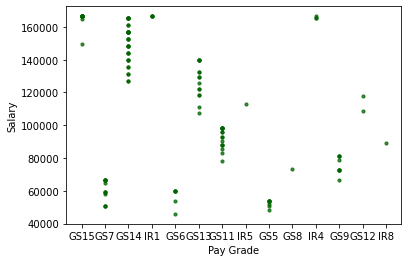

<Figure size 1440x1440 with 0 Axes>

In [49]:
scatterplot(irs_2018sf['Pay_Grade'], irs_2018sf['Salary'], x_label="Pay Grade", y_label='Salary')
fig= plt.figure(figsize=(20,20))

# Creating a Regression Model

In [50]:
from sklearn.linear_model import LinearRegression #importing the package
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [51]:
# Selecting the two columns for the regression model
X = pd.DataFrame(irs_2018sf['Salary'])
y = pd.DataFrame(irs_2018sf['Grade'])

In [52]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.30193332468537404, 0.37586715293660733, 0.3978411899438985]


# Train Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

# Linear Regression Intercept

In [55]:
print(regressor.intercept_)

[4.79387499]


# Coefficient

In [56]:
print(regressor.coef_)

[[5.27273552e-05]]


# Y-Predictor

In [49]:
y_pred = regressor.predict(X_test)
y_pred

array([[13.28856827],
       [ 9.07190895],
       [ 7.84309794],
       [ 8.63321735],
       [ 7.32774077],
       [13.57297962],
       [ 7.54487202],
       [13.57297962],
       [13.57297962],
       [10.76071341],
       [ 8.29154409],
       [13.57297962],
       [13.57297962],
       [13.06500428],
       [12.8414403 ],
       [ 7.61721395],
       [11.22555777],
       [12.17127561],
       [12.39431232],
       [ 9.50495872],
       [ 8.63321735],
       [ 8.29154409],
       [13.51213225],
       [10.46892022],
       [12.8414403 ],
       [ 7.48434101]])